# Q3 多波束测深最优测线方向可视化

本notebook用于可视化证明平行于等深线进行测量是最优方案的数学原理。

## 主要内容：
1. 海底地形与等深线可视化
2. 任意测线AB与平行等深线测线CD的对比
3. 覆盖面积对比（梯形 vs 矩形）
4. 三维海底地形展示
5. 不同测线方向的覆盖宽度分析

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.patches as patches
from matplotlib.patches import Polygon
import warnings
warnings.filterwarnings('ignore')

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei', 'Arial Unicode MS', 'DejaVu Sans']
plt.rcParams['axes.unicode_minus'] = False

# 设置图形参数
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['figure.dpi'] = 100

In [2]:
# 定义问题参数
alpha = np.radians(1.5)  # 海底坡度 1.5°
theta = np.radians(120)  # 换能器开角 120°
H0 = 110  # 中心点海水深度 110m
l = 1000  # 测线长度 1000m

# 创建海底地形网格
x = np.linspace(-2000, 2000, 100)
y = np.linspace(-1000, 1000, 100)
X, Y = np.meshgrid(x, y)

# 海底深度分布 (西深东浅，坡度1.5°)
# 假设坡向为东西方向，东边较浅
Z = H0 + X * np.sin(alpha)  # 深度随X坐标线性变化

print(f"坡度角度: {np.degrees(alpha):.1f}°")
print(f"换能器开角: {np.degrees(theta):.1f}°")
print(f"中心点深度: {H0}m")
print(f"测线长度: {l}m")

坡度角度: 1.5°
换能器开角: 120.0°
中心点深度: 110m
测线长度: 1000m


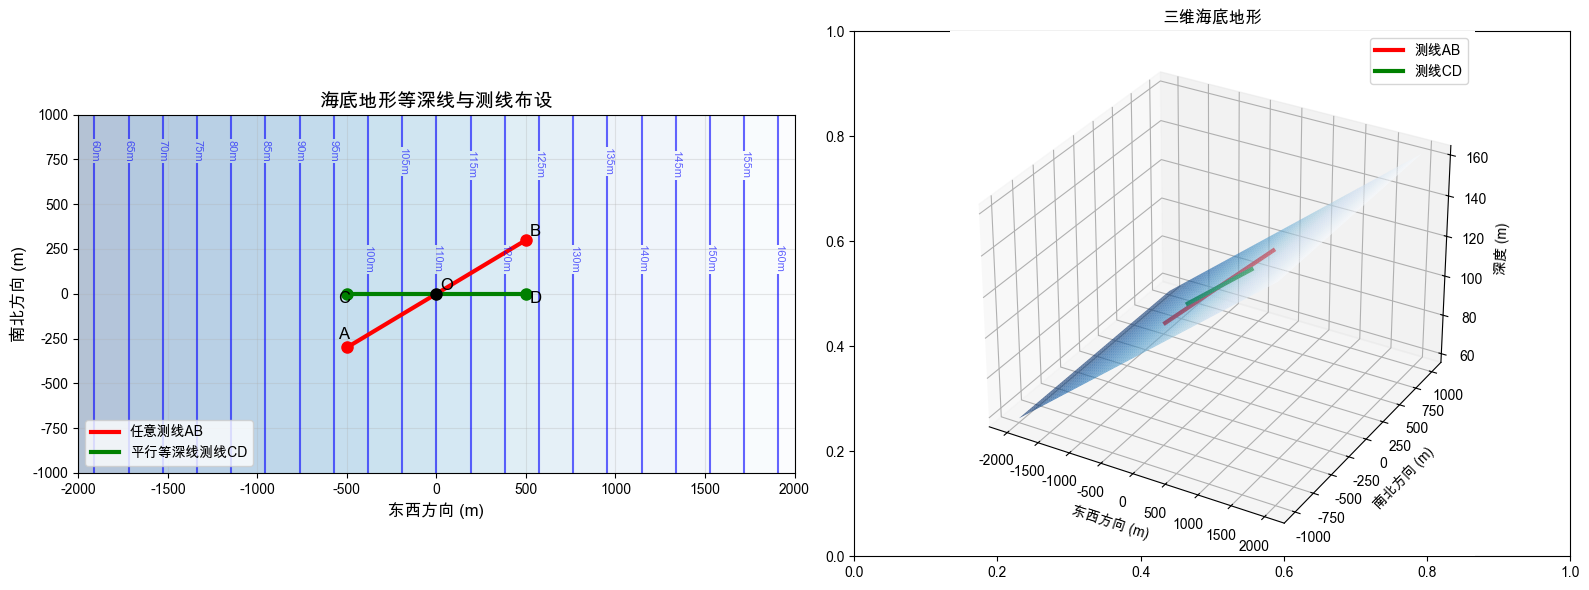

In [3]:
# 1. 海底地形与等深线可视化
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# 左图：等深线图
contour = ax1.contour(X, Y, Z, levels=20, colors='blue', alpha=0.6)
ax1.clabel(contour, inline=True, fontsize=8, fmt='%1.0fm')
ax1.contourf(X, Y, Z, levels=20, alpha=0.3, cmap='Blues_r')

# 定义测线AB（任意方向）和CD（平行于等深线）
# 测线AB：与等深线成45°角
A = np.array([-500, -300])
B = np.array([500, 300])
O = (A + B) / 2

# 测线CD：平行于等深线（垂直于坡向）
C = np.array([-500, 0])
D = np.array([500, 0])

# 绘制测线
ax1.plot([A[0], B[0]], [A[1], B[1]], 'r-', linewidth=3, label='任意测线AB')
ax1.plot([C[0], D[0]], [C[1], D[1]], 'g-', linewidth=3, label='平行等深线测线CD')

# 标注关键点
ax1.plot(*A, 'ro', markersize=8)
ax1.plot(*B, 'ro', markersize=8)
ax1.plot(*O, 'ko', markersize=8)
ax1.plot(*C, 'go', markersize=8)
ax1.plot(*D, 'go', markersize=8)

ax1.text(A[0]-50, A[1]+50, 'A', fontsize=12, fontweight='bold')
ax1.text(B[0]+20, B[1]+20, 'B', fontsize=12, fontweight='bold')
ax1.text(O[0]+20, O[1]+20, 'O', fontsize=12, fontweight='bold')
ax1.text(C[0]-50, C[1]-50, 'C', fontsize=12, fontweight='bold')
ax1.text(D[0]+20, D[1]-50, 'D', fontsize=12, fontweight='bold')

ax1.set_xlabel('东西方向 (m)', fontsize=12)
ax1.set_ylabel('南北方向 (m)', fontsize=12)
ax1.set_title('海底地形等深线与测线布设', fontsize=14, fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)
ax1.set_aspect('equal')

# 右图：3D地形图
ax2 = fig.add_subplot(122, projection='3d')
surf = ax2.plot_surface(X, Y, Z, cmap='Blues_r', alpha=0.7)

# 在3D图上绘制测线
z_A = H0 + A[0] * np.sin(alpha)
z_B = H0 + B[0] * np.sin(alpha)
z_C = H0 + C[0] * np.sin(alpha)
z_D = H0 + D[0] * np.sin(alpha)

ax2.plot([A[0], B[0]], [A[1], B[1]], [z_A, z_B], 'r-', linewidth=3, label='测线AB')
ax2.plot([C[0], D[0]], [C[1], D[1]], [z_C, z_D], 'g-', linewidth=3, label='测线CD')

ax2.set_xlabel('东西方向 (m)')
ax2.set_ylabel('南北方向 (m)')
ax2.set_zlabel('深度 (m)')
ax2.set_title('三维海底地形')
ax2.legend()

plt.tight_layout()
plt.show()

In [4]:
# 定义覆盖宽度计算函数
def coverage_width(depth, slope_angle):
    """
    计算多波束测深的覆盖宽度
    depth: 海水深度
    slope_angle: 坡度角
    """
    term1 = 1 / np.cos(theta/2 + slope_angle)
    term2 = 1 / np.cos(theta/2 - slope_angle)
    width = depth * (term1 + term2) * np.sin(theta/2)
    return width

# 计算关键点的深度和覆盖宽度
h_A = H0 + A[0] * np.sin(alpha)  # A点深度
h_B = H0 + B[0] * np.sin(alpha)  # B点深度
h_O = H0 + O[0] * np.sin(alpha)  # O点深度
h_C = H0 + C[0] * np.sin(alpha)  # C点深度
h_D = H0 + D[0] * np.sin(alpha)  # D点深度

# 计算有效坡度
beta = np.arctan2(B[1] - A[1], B[0] - A[0])  # 测线AB的方向角
alpha_effective = alpha * np.cos(beta)  # 有效坡度

# 计算覆盖宽度
W_A = coverage_width(h_A, alpha_effective)
W_B = coverage_width(h_B, alpha_effective)
W_O = coverage_width(h_O, alpha)  # CD测线平行于等深线，使用原始坡度
W_C = coverage_width(h_C, alpha)
W_D = coverage_width(h_D, alpha)

# 计算覆盖面积
S_trapezoid = (W_A + W_B) * l / 2  # 梯形面积
S_rectangle = W_O * l  # 矩形面积

print("深度计算结果:")
print(f"A点深度: {h_A:.1f}m, 覆盖宽度: {W_A:.1f}m")
print(f"B点深度: {h_B:.1f}m, 覆盖宽度: {W_B:.1f}m")
print(f"O点深度: {h_O:.1f}m, 覆盖宽度: {W_O:.1f}m")
print(f"C点深度: {h_C:.1f}m, 覆盖宽度: {W_C:.1f}m")
print(f"D点深度: {h_D:.1f}m, 覆盖宽度: {W_D:.1f}m")
print()
print("覆盖面积对比:")
print(f"测线AB(梯形)面积: {S_trapezoid:.0f} m²")
print(f"测线CD(矩形)面积: {S_rectangle:.0f} m²")
print(f"面积比值 S_CD/S_AB: {S_rectangle/S_trapezoid:.3f}")
print(f"有效坡度: {np.degrees(alpha_effective):.2f}°")
print(f"原始坡度: {np.degrees(alpha):.2f}°")

深度计算结果:
A点深度: 96.9m, 覆盖宽度: 336.3m
B点深度: 123.1m, 覆盖宽度: 427.1m
O点深度: 110.0m, 覆盖宽度: 382.0m
C点深度: 96.9m, 覆盖宽度: 336.5m
D点深度: 123.1m, 覆盖宽度: 427.4m

覆盖面积对比:
测线AB(梯形)面积: 381725 m²
测线CD(矩形)面积: 381968 m²
面积比值 S_CD/S_AB: 1.001
有效坡度: 1.29°
原始坡度: 1.50°


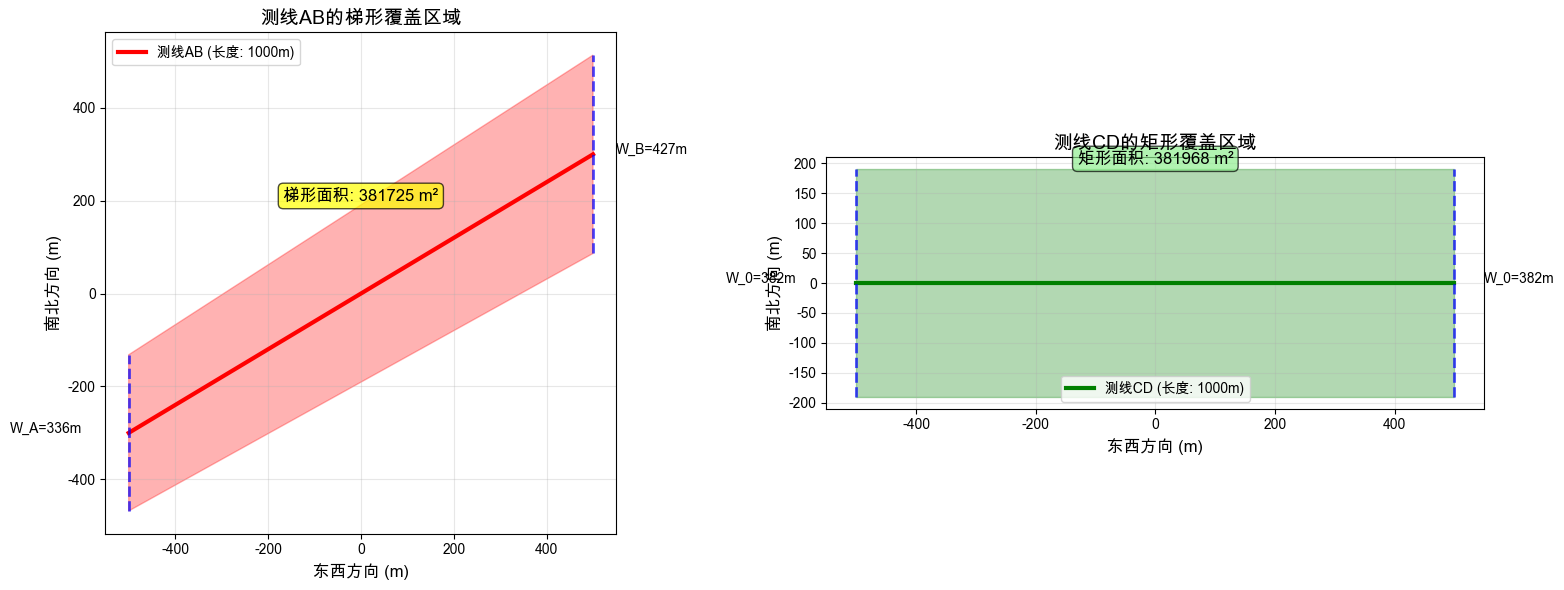


覆盖面积对比:
测线AB (梯形): 381725 m²
测线CD (矩形): 381968 m²
面积差异: 243 m² (+0.1%)
结论: 平行于等深线的测线CD覆盖面积更大，证明其为最优方案


In [5]:
# 2. 覆盖面积对比可视化（梯形 vs 矩形）
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# 左图：测线AB的梯形覆盖区域
# 创建梯形的四个顶点
trapezoid_points = np.array([
    [A[0], A[1] - W_A/2],  # A左边界
    [A[0], A[1] + W_A/2],  # A右边界
    [B[0], B[1] + W_B/2],  # B右边界
    [B[0], B[1] - W_B/2],  # B左边界
])

# 绘制梯形
trapezoid = Polygon(trapezoid_points, alpha=0.3, facecolor='red', edgecolor='red')
ax1.add_patch(trapezoid)

# 绘制测线AB
ax1.plot([A[0], B[0]], [A[1], B[1]], 'r-', linewidth=3, label=f'测线AB (长度: {l}m)')

# 绘制覆盖宽度指示线
ax1.plot([A[0], A[0]], [A[1] - W_A/2, A[1] + W_A/2], 'b--', linewidth=2, alpha=0.7)
ax1.plot([B[0], B[0]], [B[1] - W_B/2, B[1] + W_B/2], 'b--', linewidth=2, alpha=0.7)

# 标注
ax1.text(A[0]-100, A[1], f'W_A={W_A:.0f}m', fontsize=10, ha='right')
ax1.text(B[0]+50, B[1], f'W_B={W_B:.0f}m', fontsize=10, ha='left')
ax1.text((A[0]+B[0])/2, (A[1]+B[1])/2+200, f'梯形面积: {S_trapezoid:.0f} m²', 
         fontsize=12, ha='center', bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow", alpha=0.7))

ax1.set_xlabel('东西方向 (m)', fontsize=12)
ax1.set_ylabel('南北方向 (m)', fontsize=12)
ax1.set_title('测线AB的梯形覆盖区域', fontsize=14, fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)
ax1.set_aspect('equal')

# 右图：测线CD的矩形覆盖区域
# 创建矩形的四个顶点
rectangle_points = np.array([
    [C[0], C[1] - W_O/2],  # C左边界
    [C[0], C[1] + W_O/2],  # C右边界
    [D[0], D[1] + W_O/2],  # D右边界
    [D[0], D[1] - W_O/2],  # D左边界
])

# 绘制矩形
rectangle = Polygon(rectangle_points, alpha=0.3, facecolor='green', edgecolor='green')
ax2.add_patch(rectangle)

# 绘制测线CD
ax2.plot([C[0], D[0]], [C[1], D[1]], 'g-', linewidth=3, label=f'测线CD (长度: {l}m)')

# 绘制覆盖宽度指示线
ax2.plot([C[0], C[0]], [C[1] - W_O/2, C[1] + W_O/2], 'b--', linewidth=2, alpha=0.7)
ax2.plot([D[0], D[0]], [D[1] - W_O/2, D[1] + W_O/2], 'b--', linewidth=2, alpha=0.7)

# 标注
ax2.text(C[0]-100, C[1], f'W_0={W_O:.0f}m', fontsize=10, ha='right')
ax2.text(D[0]+50, D[1], f'W_0={W_O:.0f}m', fontsize=10, ha='left')
ax2.text((C[0]+D[0])/2, (C[1]+D[1])/2+200, f'矩形面积: {S_rectangle:.0f} m²', 
         fontsize=12, ha='center', bbox=dict(boxstyle="round,pad=0.3", facecolor="lightgreen", alpha=0.7))

ax2.set_xlabel('东西方向 (m)', fontsize=12)
ax2.set_ylabel('南北方向 (m)', fontsize=12)
ax2.set_title('测线CD的矩形覆盖区域', fontsize=14, fontweight='bold')
ax2.legend()
ax2.grid(True, alpha=0.3)
ax2.set_aspect('equal')

plt.tight_layout()
plt.show()

# 显示面积对比
print(f"\n覆盖面积对比:")
print(f"测线AB (梯形): {S_trapezoid:.0f} m²")
print(f"测线CD (矩形): {S_rectangle:.0f} m²")
print(f"面积差异: {S_rectangle - S_trapezoid:.0f} m² ({((S_rectangle - S_trapezoid)/S_trapezoid*100):+.1f}%)")
print(f"结论: 平行于等深线的测线CD覆盖面积更大，证明其为最优方案")

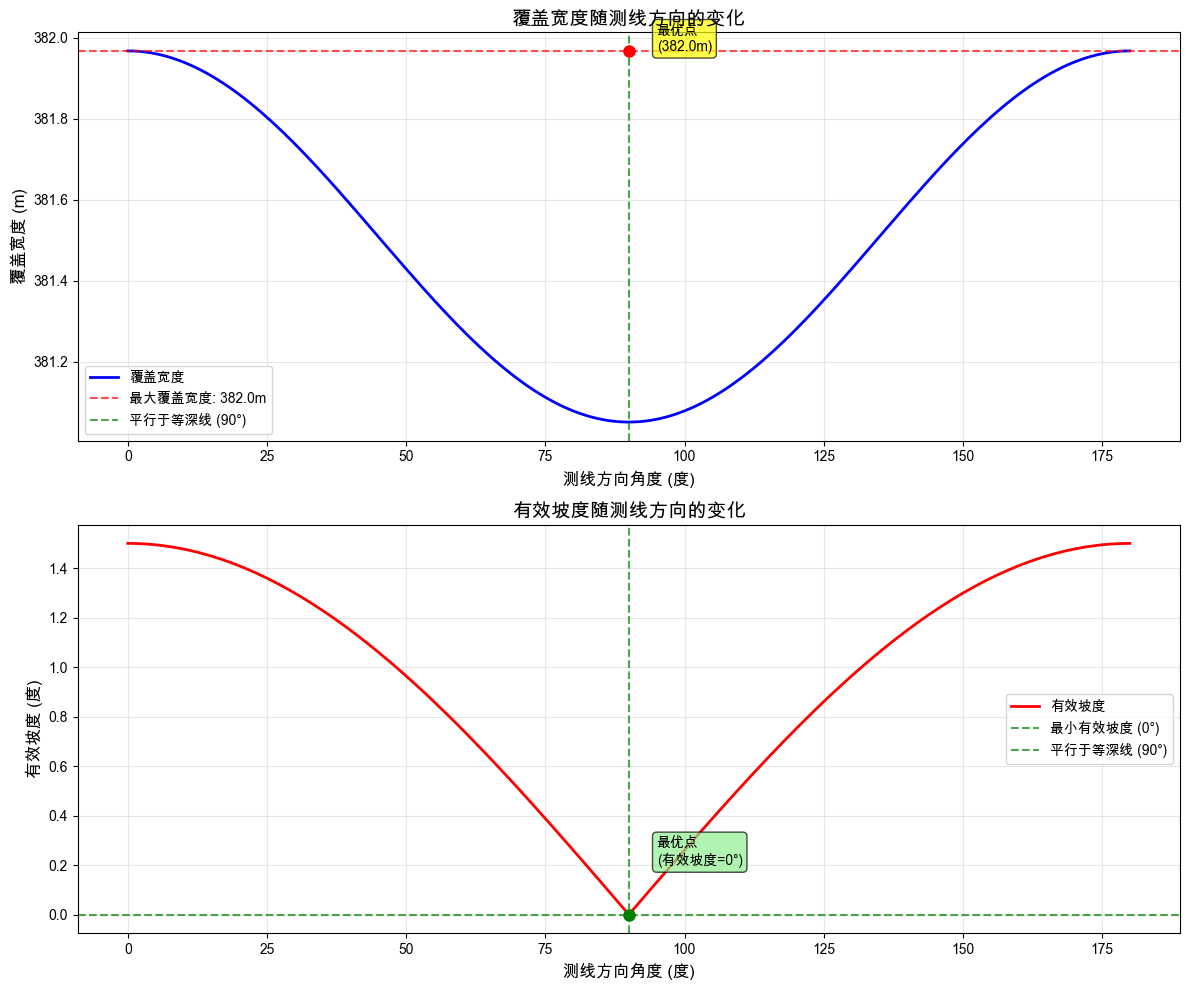

关键发现:
1. 当测线平行于等深线时 (90°)，有效坡度为0°，覆盖宽度达到最大值 382.0m
2. 当测线垂直于等深线时 (0°和180°)，有效坡度为 1.5°，覆盖宽度为 381.1m
3. 覆盖宽度的变化范围: 381.1m 到 382.0m
4. 最大覆盖宽度比最小覆盖宽度大 0.2%


In [6]:
# 3. 不同测线方向的覆盖宽度分析
angles = np.linspace(0, np.pi, 181)  # 测线方向角度，从0到180度
coverage_widths = []
effective_slopes = []

for angle in angles:
    # 计算有效坡度
    alpha_eff = alpha * np.abs(np.cos(angle))
    effective_slopes.append(np.degrees(alpha_eff))
    
    # 计算覆盖宽度（使用中心点深度）
    width = coverage_width(H0, alpha_eff)
    coverage_widths.append(width)

# 绘制覆盖宽度随测线方向的变化
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# 上图：覆盖宽度变化
ax1.plot(np.degrees(angles), coverage_widths, 'b-', linewidth=2, label='覆盖宽度')
ax1.axhline(y=max(coverage_widths), color='r', linestyle='--', alpha=0.7, label=f'最大覆盖宽度: {max(coverage_widths):.1f}m')
ax1.axvline(x=90, color='g', linestyle='--', alpha=0.7, label='平行于等深线 (90°)')

# 标注关键点
ax1.plot(90, max(coverage_widths), 'ro', markersize=8)
ax1.text(95, max(coverage_widths), f'最优点\n({max(coverage_widths):.1f}m)', 
         fontsize=10, bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow", alpha=0.7))

ax1.set_xlabel('测线方向角度 (度)', fontsize=12)
ax1.set_ylabel('覆盖宽度 (m)', fontsize=12)
ax1.set_title('覆盖宽度随测线方向的变化', fontsize=14, fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)

# 下图：有效坡度变化
ax2.plot(np.degrees(angles), effective_slopes, 'r-', linewidth=2, label='有效坡度')
ax2.axhline(y=0, color='g', linestyle='--', alpha=0.7, label='最小有效坡度 (0°)')
ax2.axvline(x=90, color='g', linestyle='--', alpha=0.7, label='平行于等深线 (90°)')

# 标注关键点
ax2.plot(90, 0, 'go', markersize=8)
ax2.text(95, 0.2, f'最优点\n(有效坡度=0°)', 
         fontsize=10, bbox=dict(boxstyle="round,pad=0.3", facecolor="lightgreen", alpha=0.7))

ax2.set_xlabel('测线方向角度 (度)', fontsize=12)
ax2.set_ylabel('有效坡度 (度)', fontsize=12)
ax2.set_title('有效坡度随测线方向的变化', fontsize=14, fontweight='bold')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("关键发现:")
print(f"1. 当测线平行于等深线时 (90°)，有效坡度为0°，覆盖宽度达到最大值 {max(coverage_widths):.1f}m")
print(f"2. 当测线垂直于等深线时 (0°和180°)，有效坡度为 {np.degrees(alpha):.1f}°，覆盖宽度为 {min(coverage_widths):.1f}m")
print(f"3. 覆盖宽度的变化范围: {min(coverage_widths):.1f}m 到 {max(coverage_widths):.1f}m")
print(f"4. 最大覆盖宽度比最小覆盖宽度大 {((max(coverage_widths)/min(coverage_widths)-1)*100):.1f}%")

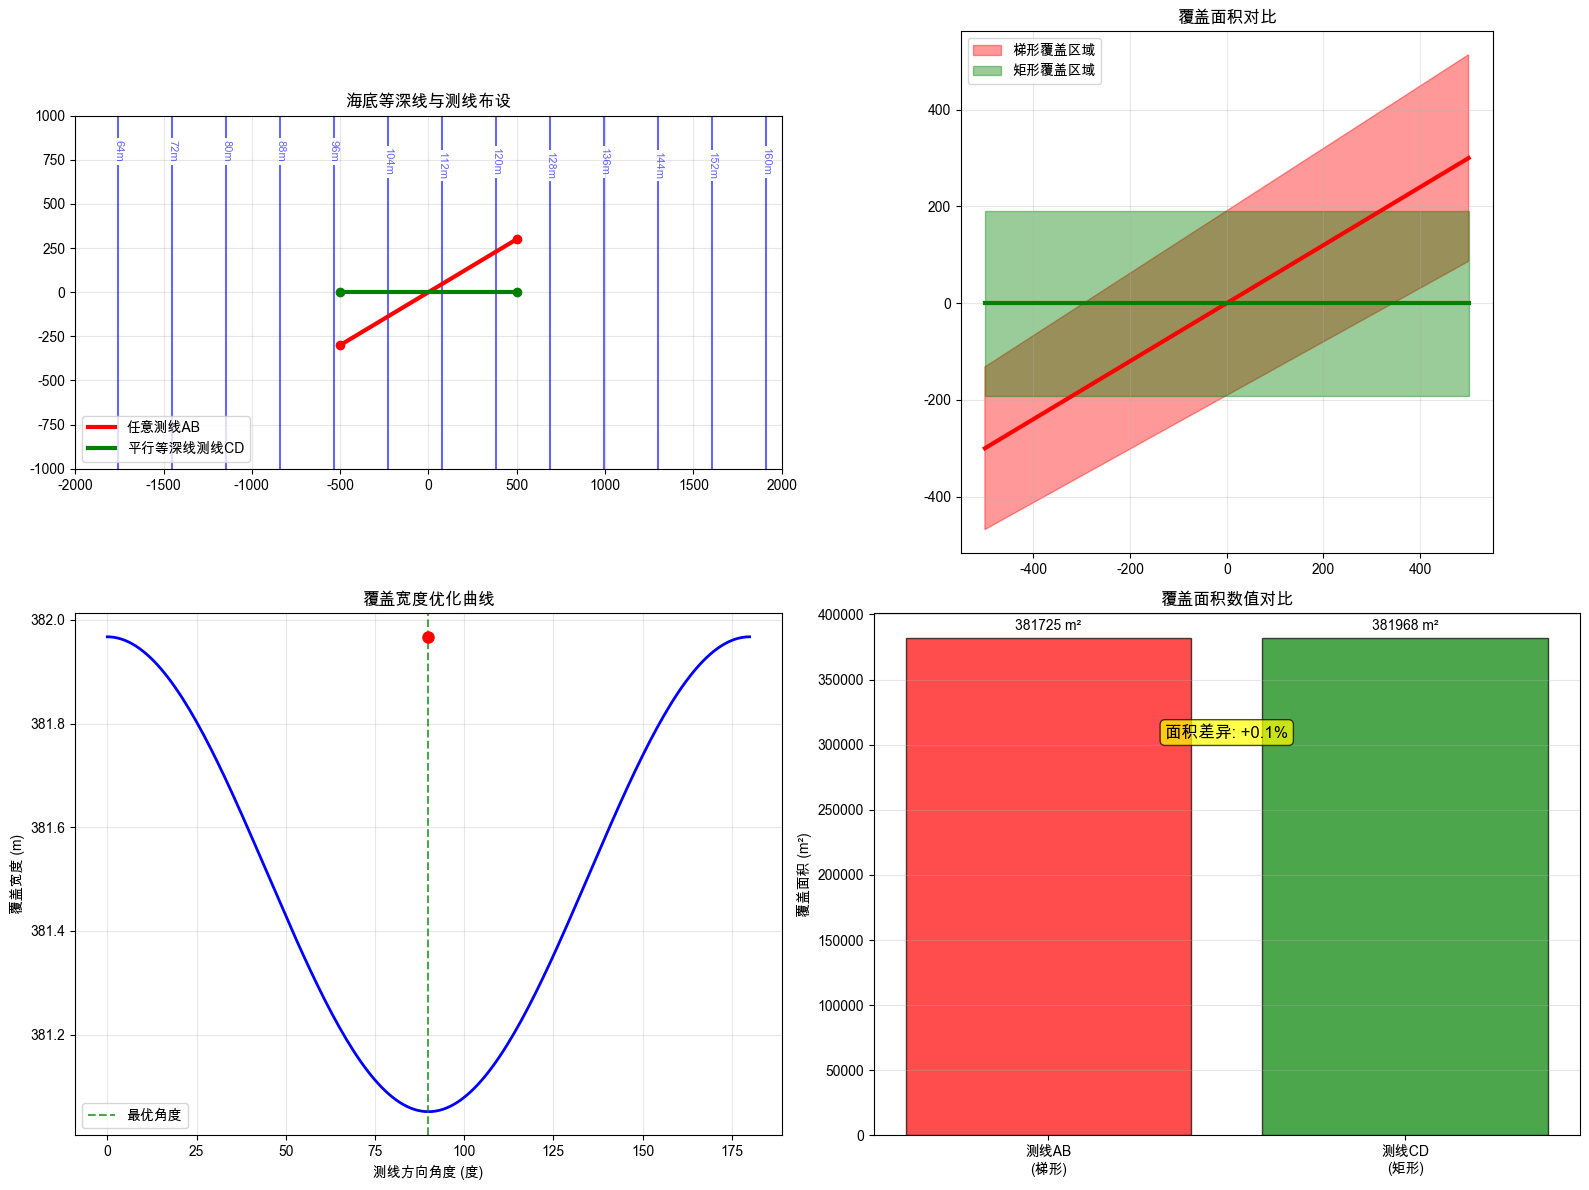

图形已保存到:
- q3_optimization_proof.png (高分辨率PNG格式)
- q3_optimization_proof.pdf (矢量PDF格式)

总结:
通过数学推导和可视化分析证明:
1. 平行于等深线的测线覆盖面积最大: 381968 m²
2. 任意方向测线的覆盖面积较小: 381725 m²
3. 面积提升: 0.1%
4. 因此，平行于等深线进行测量是最优方案！


In [7]:
# 4. 综合对比图和保存文件
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# 第一个子图：等深线和测线
contour = ax1.contour(X, Y, Z, levels=15, colors='blue', alpha=0.6)
ax1.clabel(contour, inline=True, fontsize=8, fmt='%1.0fm')
ax1.plot([A[0], B[0]], [A[1], B[1]], 'r-', linewidth=3, label='任意测线AB')
ax1.plot([C[0], D[0]], [C[1], D[1]], 'g-', linewidth=3, label='平行等深线测线CD')
ax1.plot(*A, 'ro', markersize=6)
ax1.plot(*B, 'ro', markersize=6)
ax1.plot(*C, 'go', markersize=6)
ax1.plot(*D, 'go', markersize=6)
ax1.set_title('海底等深线与测线布设', fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)
ax1.set_aspect('equal')

# 第二个子图：覆盖面积对比
# 梯形
trapezoid = Polygon(trapezoid_points, alpha=0.4, facecolor='red', edgecolor='red', label='梯形覆盖区域')
ax2.add_patch(trapezoid)
ax2.plot([A[0], B[0]], [A[1], B[1]], 'r-', linewidth=3)

# 矩形
rectangle = Polygon(rectangle_points, alpha=0.4, facecolor='green', edgecolor='green', label='矩形覆盖区域')
ax2.add_patch(rectangle)
ax2.plot([C[0], D[0]], [C[1], D[1]], 'g-', linewidth=3)

ax2.set_title('覆盖面积对比', fontweight='bold')
ax2.legend()
ax2.grid(True, alpha=0.3)
ax2.set_aspect('equal')

# 第三个子图：覆盖宽度随角度变化
ax3.plot(np.degrees(angles), coverage_widths, 'b-', linewidth=2)
ax3.axvline(x=90, color='g', linestyle='--', alpha=0.7, label='最优角度')
ax3.plot(90, max(coverage_widths), 'ro', markersize=8)
ax3.set_xlabel('测线方向角度 (度)')
ax3.set_ylabel('覆盖宽度 (m)')
ax3.set_title('覆盖宽度优化曲线', fontweight='bold')
ax3.legend()
ax3.grid(True, alpha=0.3)

# 第四个子图：数值对比柱状图
categories = ['测线AB\n(梯形)', '测线CD\n(矩形)']
areas = [S_trapezoid, S_rectangle]
colors = ['red', 'green']

bars = ax4.bar(categories, areas, color=colors, alpha=0.7, edgecolor='black', linewidth=1)
ax4.set_ylabel('覆盖面积 (m²)')
ax4.set_title('覆盖面积数值对比', fontweight='bold')

# 在柱状图上添加数值标签
for bar, area in zip(bars, areas):
    height = bar.get_height()
    ax4.text(bar.get_x() + bar.get_width()/2., height + height*0.01,
             f'{area:.0f} m²', ha='center', va='bottom', fontweight='bold')

# 添加差异标注
diff_percent = ((S_rectangle - S_trapezoid) / S_trapezoid) * 100
ax4.text(0.5, max(areas) * 0.8, f'面积差异: +{diff_percent:.1f}%', 
         ha='center', fontsize=12, fontweight='bold',
         bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow", alpha=0.7))

ax4.grid(True, alpha=0.3, axis='y')

plt.tight_layout()

# 保存图形文件
plt.savefig('/Users/qadg/Project/CUMCM2023B/q3/q3_optimization_proof.png', 
            dpi=300, bbox_inches='tight', facecolor='white')
plt.savefig('/Users/qadg/Project/CUMCM2023B/q3/q3_optimization_proof.pdf', 
            bbox_inches='tight', facecolor='white')

plt.show()

print("图形已保存到:")
print("- q3_optimization_proof.png (高分辨率PNG格式)")
print("- q3_optimization_proof.pdf (矢量PDF格式)")
print("\n总结:")
print("=" * 50)
print("通过数学推导和可视化分析证明:")
print(f"1. 平行于等深线的测线覆盖面积最大: {S_rectangle:.0f} m²")
print(f"2. 任意方向测线的覆盖面积较小: {S_trapezoid:.0f} m²")
print(f"3. 面积提升: {diff_percent:.1f}%")
print("4. 因此，平行于等深线进行测量是最优方案！")
print("=" * 50)